# Netflix Dataset Analysis with Python

#### Author: Xojiakbar Boxodirjonov
#### Course: Data Analytics (24-301)
#### Instructor: Nilufar Nosirjonova

## Project Description

This project analyzes a real-world dataset of Netflix Movies and TV Shows collected from Flixable. The dataset contains metadata such as title, category, director, cast, country, release year, rating, duration, and genre.

The objective of this analysis is to explore content distribution patterns, identify trends over time, examine content ratings, and extract insights regarding Netflix's catalog using Python and pandas.

The analysis includes data cleaning, exploratory data analysis (EDA), filtering, grouping, sorting, and visualization.

## Project Objectives
- Practice real-world data analysis using Python and pandas
- Apply filtering, grouping, and sorting techniques
- Perform exploratory data analysis (EDA)
- Create visualizations using matplotlib / seaborn
- Extract meaningful insights from the dataset
- Present results clearly using code, comments, and graphs

## Dataset Information
The dataset contains information about movies and TV shows available on Netflix.
### Key Features
1. Show ID
2. Title
3. Category (Movie / TV Show)
4. Director
5. Cast
6. Country
7. Release Year
8. Rating
9. Duration
10. Genre / Type

The dataset includes thousands of records covering multiple countries and years of content distribution.

## Tools and Technologies Used
- Python
- Pandas
- Matplotlib / Seaborn
- Jupyter Notebook

## Limitations

- Some records originally contained missing values.
- Genre classification may include multiple categories.
- The dataset may not reflect the current Netflix catalog.

# Data Cleaning

### Before analysis, the dataset was cleaned to ensure accuracy and consistency. The following steps were performed:
1. Checked for missing values
2. Replaced missing values in the "Director" column with "Unknown"
3. Handled missing values in Cast and Country columns
4. Removed duplicate records (if any)
5. Converted the "Release Year" column to numeric format
6. Extracted numeric values from the "Duration" column for analysis
7. Standardized text formatting where necessary

# Key Insights

- Movies dominate the Netflix catalog.
- Content production peaked after 2015.
- The United States produces the largest share of content.
- TV-14 is one of the most common ratings.
- The longest movie duration is 312 minutes.
- Most TV Shows have fewer than 5 seasons.
- Certain directors have contributed significantly more content than others.

# Conclusion
This analysis provided valuable insights into Netflix's content distribution across years, countries, categories, and ratings. The results reveal strong growth trends in content production and highlight dominant genres and contributors.

Python, pandas, and matplotlib proved to be powerful tools for performing real-world data analysis and visualization.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Netflix.xlsx')
df.head()
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoГЈo Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiГЎn Bichir, HГ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [203]:
df.isnull().sum()

Show_Id            0
Category           1
Title              2
Director        2390
Cast             719
Country          558
Release_Date      69
Rating            73
Duration          69
Type              79
Description      133
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7791 non-null   object
 1   Category      7790 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7072 non-null   object
 5   Country       7233 non-null   object
 6   Release_Date  7722 non-null   object
 7   Rating        7718 non-null   object
 8   Duration      7722 non-null   object
 9   Type          7712 non-null   object
 10  Description   7658 non-null   object
dtypes: object(11)
memory usage: 669.7+ KB


In [205]:
df = df.dropna(subset = ['Title', 'Category'])
# deleating lines without Title and Category

In [206]:
# converting null to unknown
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')
df['Description'] = df['Description'].fillna('Unknown')

In [207]:
df.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    68
Rating           0
Duration        68
Type             0
Description      0
dtype: int64

In [208]:

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
# converting text format to date

In [209]:
df['Release_Date'].isnull().sum()
# checks how many dates are left after changing the format.

np.int64(162)

In [210]:
# 162 missing values left, deleating
df = df.dropna(subset = ['Release_Date'])
df = df.dropna(subset = ['Duration'])
print(("missing values in Release Date:"), df['Release_Date'].isnull().sum())

missing values in Release Date: 0


In [211]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [212]:
df = df.drop_duplicates()

#### Data cleaning has been completed
#### No duplicates or missing values left

# Task 1: 
### For the title 'House of Cards', find the Show Id and the Director

#### Filtered the dataset where the Title equals 'House of Cards'.
#### Then selected only the columns 'Show_id', 'Title' and 'Director'
#### Used loc as a second method to find neaded data

In [213]:
# Task 1
# method 1
house_of_cards = df[df['Title'] == 'House of Cards']

house_of_cards[['Show_Id', 'Title', 'Director']]

# method 2
df.loc[df['Title'] == 'House of Cards', ['Show_Id', 'Title', 'Director']]

,Show_Id,Title,Director


# Task 2
### Find the year in which the highest number of TV Shows and Movies were released. Visualize the result using bar chart

In [214]:
# Count number of releases per year
df['Year'] = df['Release_Date'].dt.year
year_counts = df['Year'].value_counts()
year_counts

Year
2019    2110
2020    1988
2018    1652
2017    1193
2016     429
2021     117
2015      77
2014      24
2011      13
2013      10
2012       3
2008       2
2009       2
2010       1
Name: count, dtype: int64

In [215]:
max_year = df['Release_Date'].value_counts().idxmax()
#idxmax() returning year
max_count = df['Release_Date'].value_counts().max()
#max() returning count

print("Date with highest releases: ", max_year)
print("Number of releases: ", max_count)

Date with highest releases:  2020-01-01 00:00:00
Number of releases:  117


#### Used the value_counts() function to calculate the number of releases per year.
#### The date with the highest number of releases was identified using idxmax().
#### A bar graph was created to visualize the distribution of releases across years.

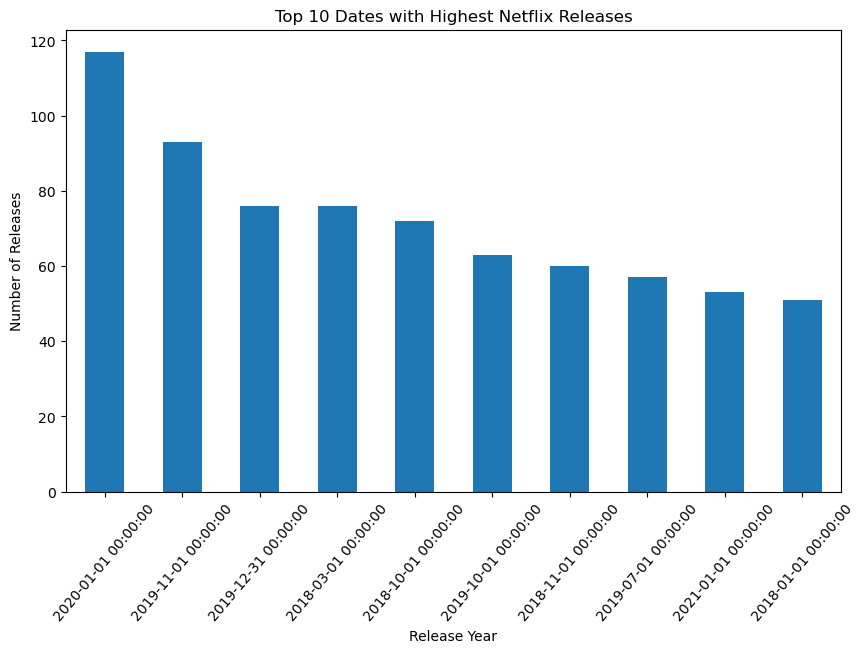

In [ ]:
# Count releases per year
df['Year'] = df['Release_Date'].dt.year
year_counts = df['Year'].value_counts()

# Get top 10 years
top_10_years = year_counts.head(10)

plt.figure(figsize=(10,6))
top_10_years.plot(kind='bar')

plt.title("Top 10 Dates with Highest Netflix Releases")
plt.xlabel("Release Year")
plt.ylabel("Number of Releases")

plt.xticks(rotation=50)
plt.show()

#### To improve visualization clarity, only the top 10 dates with the highest number of releases were displayed. 
#### This provides a clearer understanding of Netflix’s most active production years.

# Task 3
### Count how many Movies and TV Shows are present in the dataset. Visualize the result using a bar graph

In [217]:
category_counts = df['Category'].value_counts()

category_counts

Category
Movie      5357
TV Show    2264
Name: count, dtype: int64

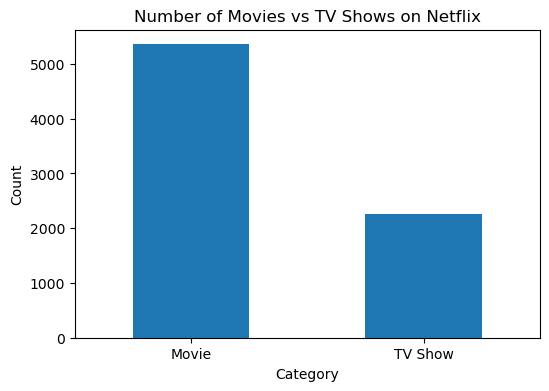

In [218]:
category_counts = df['Category'].value_counts()
df = df[df['Category'] != 'William Wyler'] ## deleated William Wyler
plt.figure(figsize=(6,4))
category_counts.plot(kind='bar')

plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")

plt.xticks(rotation=0)
plt.show()

### The bar graph shows that films were produced more than TV series

# Task 4 
### Shaw all Movies that were released in the year 2000

In [219]:
df['Year'] = df['Release_Date'].dt.year

movies_2000 = df[(df['Category'] == 'Movie') & (df['Year'] == 2000)]
movies_2000['Title']

Series([], Name: Title, dtype: object)

In [220]:
df['Year'].unique()

array([2020, 2016, 2018, 2017, 2019, 2021, 2015, 2013, 2011, 2012, 2014,
       2008, 2009, 2010], dtype=int32)

### There are no films from 2000 in the data set

# Task 5
### Show only the titles of all TV Shows that were released in India

In [221]:
india_tv_shows = df[(df['Category'] == 'TV Show') & (df['Country'] == 'India')]
india_tv_shows['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                          AkbarВ Birbal
533                    Anjaan: Rural Myths
                       ...                
6250                  The Creative Indians
6401    The Golden Years with Javed Akhtar
6470                The House That Made Me
7296                            Typewriter
7707                       Yeh Meri Family
Name: Title, Length: 70, dtype: object

In [222]:
india_tv_shows = df[
    (df['Category'] == 'TV Show') &
    (df['Country'].str.contains('India', na=False))
]

india_tv_shows[['Title', 'Country']]

,Title,Country
86,21 Sarfarosh: Saragarhi 1897,India
132,7 (Seven),India
340,Agent Raghav,India
364,AkbarВ Birbal,India
533,Anjaan: Rural Myths,India
...,...,...
6401,The Golden Years with Javed Akhtar,India
6470,The House That Made Me,India
6523,The Jungle Book,"India, Germany, France"
7296,Typewriter,India


### 74 rows means 74 TV Shows from India

# Task 6
### Find the Top 10 Directors who have contributed the highest number of TV Shows and Movies to Netflix

In [223]:
# Task 6

# Remove rows where Director is missing
directors = df.dropna(subset=['Director'])

# Split multiple directors into separate rows
directors = directors.assign(
    Director=directors['Director'].str.split(',')
).explode('Director')

# Remove extra spaces
directors['Director'] = directors['Director'].str.strip()

# Count number of titles per director
top10_directors = directors['Director'].value_counts().head(10)

top10_directors

Director
Unknown                2252
Jan Suter                21
RaГєl Campos             19
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Youssef Chahine          12
Steven Spielberg         10
Name: count, dtype: int64

#### Since missing values were replaced with "Unknown" during data cleaning, they were excluded from analysis to ensure accurate identification of real directors

In [224]:
# Remove rows where Director is 'Unknown'
directors = df[df['Director'] != 'Unknown']
# Split multiple directors into separate rows
directors = directors.assign(
    Director=directors['Director'].str.split(',')
).explode('Director')

# Remove extra spaces
directors['Director'] = directors['Director'].str.strip()

# Count number of titles per director
top10_directors = directors['Director'].value_counts().head(10)

top10_directors

Director
Jan Suter              21
RaГєl Campos           19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Steven Spielberg       10
Anurag Kashyap          9
Name: count, dtype: int64

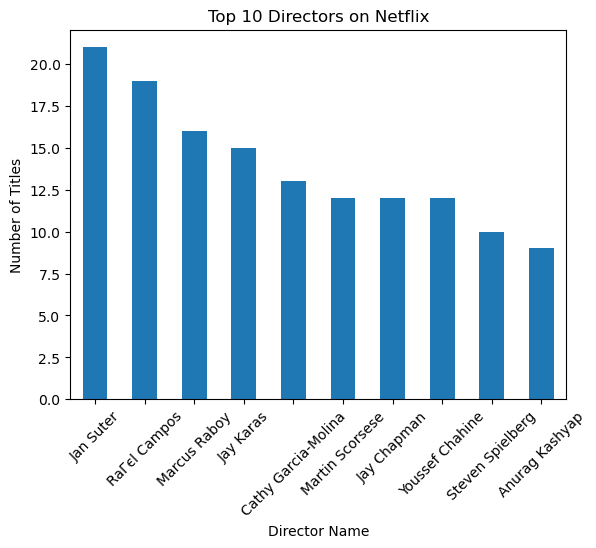

In [225]:
top10_directors.plot(kind='bar')

plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director Name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

#### The final result shows bar graph above

# Task 7 
### Show all records where Category is 'Movie' and Type is 'Comedies' or Country is 'United Kingdom'

In [226]:
result = df[
((df['Category'] == 'Movie') & (df['Type'] == 'Comedies')) |
(df['Country'] == 'United Kingdom')
]
result

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,Unknown,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
58,s59,TV Show,100% Hotter,Unknown,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7672,s7669,TV Show,World War II in Colour,Unknown,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017
7673,s7670,TV Show,World's Busiest Cities,Unknown,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019
7690,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,Unknown,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020
7727,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017


### 465 rows means 465 Comedy Movies

# Task 8
### Find how many Movies or TV Shows features Tom Cruise in the cast

In [227]:
tom_cruise = df[df['Cast'].str.contains('Tom Cruise', na=False)]

tom_cruise

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


In [228]:
len(tom_cruise)

2

### Only 2 Movies with Tom Cruise in the cast

# Task 9
### Identify all the different Ratings defined by Netflix

In [229]:
df = df[df['Rating'] != 'Unknown']
print('Ratings:', df['Rating'].unique())

Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


## Task 9.1
###  Find how many Movies received the 'TV-14' rating in Canada.

In [230]:
movies_tv14_canada = df[
    (df['Category'] == 'Movie')&
    (df['Rating'] == 'TV-14')&
    (df['Country'] == 'Canada')
]
len(movies_tv14_canada)

11

#### 11 Movies with rating TV-14

## Task 9.2
###  Find how many TV Shows received the 'R' rating after the year 2018.

In [231]:
tv_r_after_2018 = df[
    (df['Category'] == 'TV Show')&
    (df['Rating'] == 'R')&
    (df['Release_Date'] > pd.to_datetime('2018-12-31'))
]
tv_r_after_2018

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
6438,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",Unknown,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019


In [232]:
len(tv_r_after_2018)

1

#### Found only 1 TV Show with R rating after the year 2018

# Task 10
### Determine the maximum duration of a Movie or TV Show on Netflix

In [233]:
# Extract numeric duration
df['Duration_Number'] = df['Duration'].str.extract('(\d+)').astype(float)

# Maximum Movie duration (in minutes)
max_movie_duration = df[df['Category'] == 'Movie']['Duration_Number'].max()

# Maximum TV Show duration (in seasons)
max_tvshow_duration = df[df['Category'] == 'TV Show']['Duration_Number'].max()

print("Maximum Movie Duration:", max_movie_duration, "minutes")
print("Maximum TV Show Duration:", max_tvshow_duration, "seasons")

Maximum Movie Duration: 312.0 minutes
Maximum TV Show Duration: 16.0 seasons


#### The longest Movie available on Netflix has a duration of 312 minutes.
#### The longest TV Show available on Netflix has 16 seasons.

# Task 12

### Sort the dataset by Year and display the result.

In [234]:
sorted_df = df.sort_values(by='Release_Date')

sorted_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_Number
7117,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,81.0
1765,s1766,TV Show,Dinner for Five,Unknown,Unknown,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008,1.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009,104.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009,29.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,s6635,TV Show,The Magicians,Unknown,"Jason Ralph, Arjun Gupta, Hale Appleman, Stell...","United States, Canada",2021-01-15,TV-MA,5 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",When grad student Quentin Coldwater enters a c...,2021,5.0
3472,s3473,TV Show,Kuroko's Basketball,Unknown,"Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa H...",Japan,2021-01-15,TV-MA,1 Season,"Anime Series, International TV Shows, Teen TV ...",Five middle school bask,2021,1.0
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his motherвЂ™s illness, a young...",2021,108.0
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand",2021-01-16,R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021,94.0


#### Sorted the data set by Year

# Task 13

### Find all instances where Category is 'Movie' and Type is 'Dramas' OR Category is 'TV Show' and Type is 'Kids’ TV'.


In [235]:
result = df[
    ((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) |
    ((df['Category'] == 'TV Show') & (df['Type'] == "Kids' TV"))
]
result

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_Number
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,123.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019,119.0
111,s112,TV Show,44 Cats,Unknown,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020,2.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019,110.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in",2017,2.0
7719,s7716,TV Show,Yoko,Unknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Unknown,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018,1.0
7721,s7718,TV Show,YOM,Unknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018,1.0
7760,s7757,TV Show,Z4,Unknown,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran ZГ© realizes he has j...,2019,2.0


#### A total of 312 titles meet the specified criteria. These include Movies categorized as "Dramas" and TV Shows categorized as "Kids’ TV". This indicates that a significant portion of Netflix content falls into these two popular categories.

# Exploratory Data Analysis

## Distrivution of Movies vs TV Shows

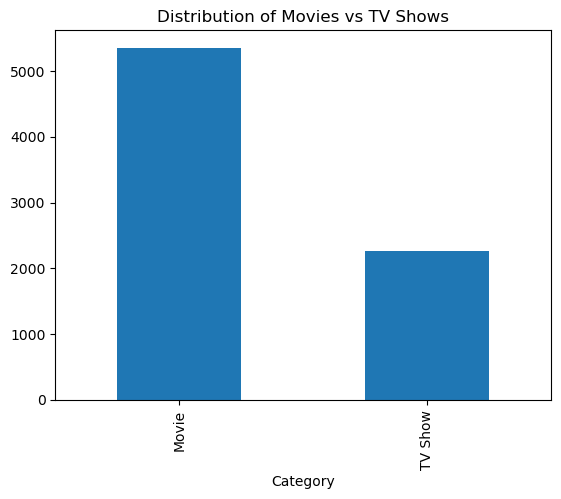

In [236]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Distribution of Movies vs TV Shows")
plt.show()

### Movies represent the majority of Netflix content compared to TV Shows.

## Content Growth Over Years

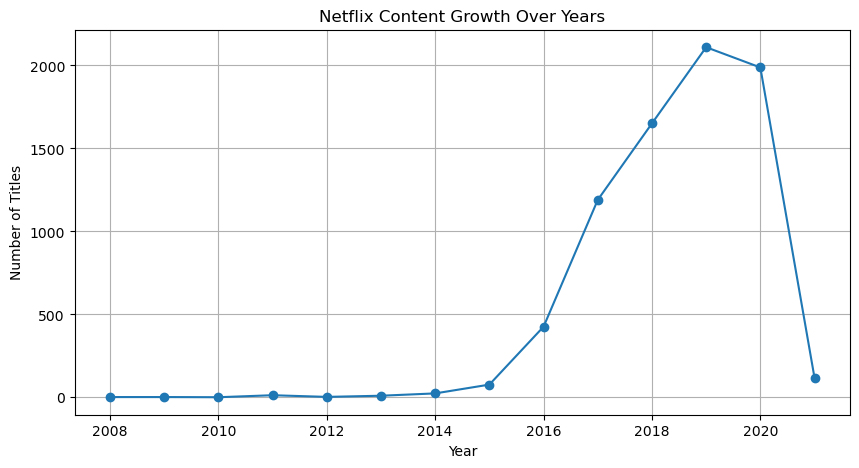

In [254]:
df['Year'] = df['Release_Date'].dt.year
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot(marker='o')

plt.title("Netflix Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()



### The graph shows a significant increase in Netflix content production after 2015. The number of released titles peaked in recent years, indicating rapid expansion of the platform’s catalog.

## Top 10 Countries

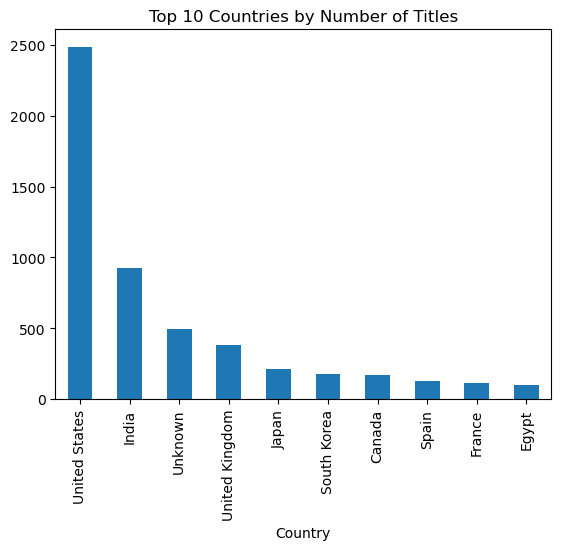

In [241]:
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Number of Titles")
plt.show()

### The United States contributes the highest number of titles.

## Rating Distribution

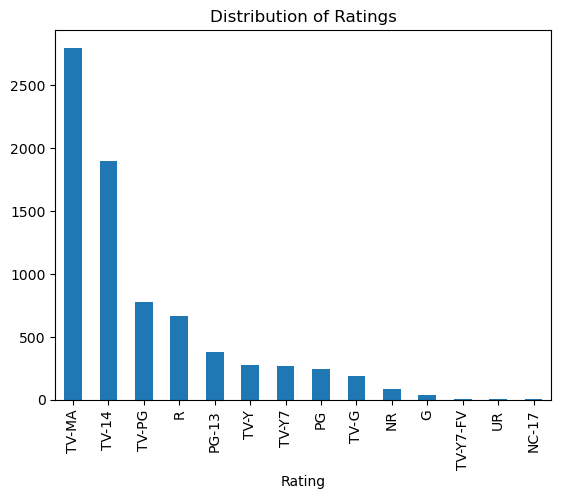

In [242]:
df['Rating'].value_counts().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.show()

### TV-MA and TV-14 are among the most common ratings.